<h1 align="center"> Predicting the Next Crypto Coin/Token Star Using Machine Learning </h1>

<h2 align="center"> Advanced Seminar Information Management </h2>

<h3 align="center"> Supervisor Prof. Dr. Schoder </h3>
  
<h4 align="center"> Pascal Grewe & Andrej Kotsovolos </h4>


# 1. Data Collection

## Imports

In [1]:
# import free Python Coin Gecko API
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import time
import san

## CoinGecko

### Coin Data

In [93]:
# get date for each row normal datetime format instead of unix in each cell
# start with input date and add one day with each next row 
def add_date(year, month, day, coin):
    size = int(coin.size/4)
    date = datetime(year, month, day)
    
    for i in range(size):
        coin.iloc[i,3] = date 
        date = date + timedelta(1)

In [94]:
# cut unix datetime from each cell
def cut_date(column, dataframe):
    length = (int(dataframe.size/3))
    df = []

    for i in range(length):
        c = (dataframe[column].iloc[i])
        c.remove(c[0])
        df.append(c)
    
    dataframe[column] = pd.DataFrame.from_dict(df)
    return dataframe[column]

In [95]:
# list all your desired coins here
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra-luna", "cardano", "avalanche-2", "stellar", "monero"]

In [96]:
# dataframes for prices, volumnes, marketcaps
prices = pd.DataFrame(columns=["a"])
market_caps = pd.DataFrame(columns=["a"])
total_volumes = pd.DataFrame(columns=["a"])

In [97]:
# get coin data for specific coin from 01-01-2018 00:00:00 to 26-04-2022 00:00:00
# start_date and end_date have to be in UNIX format 
def get_coin_data(name, start_date, end_date):
    coin = cg.get_coin_market_chart_range_by_id(id = name, vs_currency='usd', from_timestamp = start_date, to_timestamp=end_date)
    coin = pd.DataFrame.from_dict(coin)
    
    # cut unix date from dataframe
    cut_date('prices', coin)
    cut_date('market_caps', coin)
    cut_date('total_volumes', coin)
    
    # create new column for date
    coin['date'] = 1 
    # enter start date of data y,m,d
    add_date(2018, 1, 1, coin)
    # set date as index
    coin = coin.set_index(coin['date'])
    #drop date column
    coin = coin.drop('date', 1)
    
    ##########
    prices[name + "_prices"] = coin["prices"]
    market_caps[name + "_market_caps"] = coin["market_caps"]
    total_volumes[name + "_total_volumes"] = coin["total_volumes"]
    ##########
    
    coin.to_csv('./data/coingecko/CoinGecko_'+ name + '.csv', index = True)
    
    return coin

In [98]:
# enter list of coins and get csv of them
def all_coins(names, start_date, end_date):
    for i in names:
        get_coin_data(i, start_date, end_date)
        time.sleep(10) #wait 10 seconds to avoid api time out

In [99]:
# function that reads the csv and sets the index back to date
def read(file_name):
    return pd.read_csv(file_name).set_index('date')

In [100]:
# get all coin data for coins from list for timespan
all_coins(coin_list, '1514761200', '1658872800')                    

/var/folders/_m/71fq0nk106s02qxvct5s2sv80000gn/T/ipykernel_1209/2373174658.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  coin = coin.drop('date', 1)


In [101]:
# delete empty column
prices = prices.drop(columns=["a"])
total_volumes = total_volumes.drop(columns=["a"])
market_caps = market_caps.drop(columns=["a"])

In [102]:
# export csv
prices.to_csv("./data/coingecko/CoinGecko_prices"+ '.csv',index = True)
total_volumes.to_csv("./data/coingecko/CoinGecko_total_volumes"+ '.csv', index = True)
market_caps.to_csv("./data/coingecko/CoinGecko_market_caps"+ '.csv', index = True)

In [103]:
bitcoin = read('./data/coingecko/CoinGecko_bitcoin.csv')

In [104]:
ethereum = read('./data/coingecko/CoinGecko_ethereum.csv')

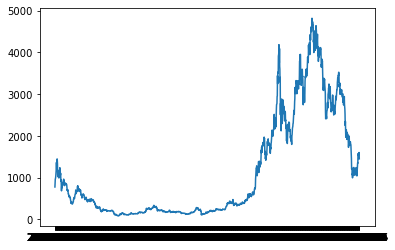

In [105]:
plt.figure()
plt.plot(ethereum['prices'])

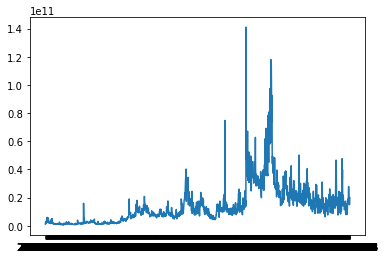

In [106]:
plt.figure()
plt.plot(ethereum['total_volumes'])

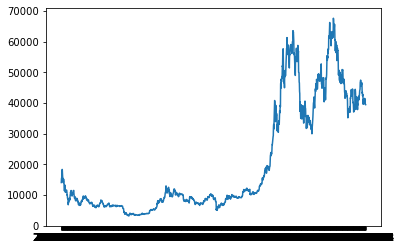

In [40]:
plt.figure()
plt.plot(bitcoin['prices'])

### Asset Platforms

In [43]:
asset = pd.DataFrame.from_dict(cg.get_asset_platforms())

In [44]:
asset

,id,chain_identifier,name,shortname
0,factom,NaN,Factom,
1,openledger,NaN,OpenLedger,
2,cosmos,NaN,Cosmos,
3,binancecoin,NaN,Binance Coin,
4,metaverse-etp,NaN,Metaverse ETP,
...,...,...,...,...
102,,NaN,CoinEx Smart Chain,CSC
103,,NaN,Everscale,
104,conflux,NaN,Conflux,conflux
105,energi,NaN,Energi,


### Categories

In [45]:
categories = pd.DataFrame.from_dict(cg.get_coins_categories())

In [46]:
categories

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,ethereum-ecosystem,Ethereum Ecosystem,5.077759e+11,3.826881,,[https://assets.coingecko.com/coins/images/279...,7.301739e+10,2022-06-06T14:56:03.419Z
1,smart-contract-platform,Smart Contract Platform,3.906363e+11,6.152757,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,2.581597e+10,2022-06-06T14:55:49.095Z
2,binance-smart-chain,BNB Chain Ecosystem,2.604823e+11,1.416223,BNB Chain is an alternative blockchain that is...,[https://assets.coingecko.com/coins/images/325...,5.189468e+10,2022-06-06T14:56:01.042Z
3,polygon-ecosystem,Polygon Ecosystem,2.441223e+11,1.485332,,[https://assets.coingecko.com/coins/images/325...,4.959907e+10,2022-06-06T14:55:32.488Z
4,avalanche-ecosystem,Avalanche Ecosystem,2.371444e+11,1.459786,None,[https://assets.coingecko.com/coins/images/325...,4.870107e+10,2022-06-06T14:55:19.874Z
...,...,...,...,...,...,...,...,...
73,defi-index,DeFi Index,1.151334e+08,7.535627,None,[https://assets.coingecko.com/coins/images/124...,1.743198e+06,2022-06-06T14:55:00.693Z
74,kardiachain-ecosystem,KardiaChain Ecosystem,7.911091e+07,9.725484,,[https://assets.coingecko.com/coins/images/794...,1.539968e+09,2022-06-06T14:55:54.829Z
75,farming-as-a-service-faas,Farming-as-a-Service (FaaS),2.386807e+07,7.925545,,[https://assets.coingecko.com/coins/images/215...,1.192472e+05,2022-06-06T14:55:58.514Z
76,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,5.456977e+04,2022-06-06T14:55:45.450Z


In [47]:
categories_list = pd.DataFrame.from_dict(cg.get_coins_categories_list())

In [48]:
categories_list

,category_id,name
0,aave-tokens,Aave Tokens
1,analytics,Analytics
2,arbitrum-ecosystem,Arbitrum Ecosystem
3,artificial-intelligence,Artificial Intelligence
4,asset-backed-tokens,Asset-backed Tokens
...,...,...
136,xdc-ecosystem,XDC Ecosystem
137,yearn-yfi-partnerships-mergers,Yearn Ecosystem
138,yield-aggregator,Yield Aggregator
139,yield-farming,Yield Farming


# Santiment

Santiment data until 27.07 (mostly 30 days or a year)

In [2]:
san.ApiConfig.api_key = '3upvxk7v73tdbsye_sda5brzu6hdnuren'

In [51]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra-luna", "cardano", "avalanche", "stellar", "monero"]

In [54]:
#check for newer coin available metrics - not all metrics are available for all coins
san.available_metrics_for_slug("cardano")

['30d_moving_avg_dev_activity_change_1d',
 'active_addresses_1h',
 'active_addresses_24h',
 'active_addresses_24h_change_1d',
 'active_addresses_24h_change_30d',
 'active_addresses_24h_change_7d',
 'adjusted_price_daa_divergence',
 'age_consumed',
 'age_consumed_change_1d',
 'age_consumed_change_30d',
 'age_consumed_change_7d',
 'age_destroyed',
 'age_destroyed_change_1d',
 'age_destroyed_change_30d',
 'age_destroyed_change_7d',
 'age_distribution',
 'bitfinex_perpetual_funding_rate',
 'circulation',
 'circulation_10y',
 'circulation_180d',
 'circulation_180d_change_1d',
 'circulation_180d_change_30d',
 'circulation_180d_change_7d',
 'circulation_1d',
 'circulation_2y',
 'circulation_30d',
 'circulation_365d',
 'circulation_3y',
 'circulation_5y',
 'circulation_60d',
 'circulation_7d',
 'circulation_90d',
 'circulation_change_1d',
 'circulation_change_30d',
 'circulation_change_7d',
 'circulation_usd_180d',
 'circulation_usd_180d_change_1d',
 'circulation_usd_180d_change_30d',
 'circul

## Prices

In [86]:
# dateformat "2018-06-01"
# function to get all coin price stats from santiment
def santiment_prices(coin_list, startdate, enddate):
    
    # create dataframe
    santiment_prices = pd.DataFrame(columns=["a"])
    santiment_marketcap = pd.DataFrame(columns=["a"])
    santiment_volumes = pd.DataFrame(columns=["a"])
    
    #api call for every coin in list
    for i in coin_list:
        a = san.get(
            "prices/"+i,
            from_date=startdate,
            to_date=enddate,
            interval="1d"
        )
        
        # create dataframe
        a = pd.DataFrame.from_dict(a)
    
        # create new column for date
        #a['date'] = 1 
        # enter start date of data y,m,d
        #add_date(2018, 1, 1, a)
        # set date as index
        #a = a.set_index(a['date'])
        #drop date column
        #a = a.drop('date', 1)
        
        # create dataframe for prices, marketcap and volume
        santiment_prices[i + "_prices"] = a["priceUsd"]
        santiment_marketcap[i + "_marketcap"] = a["marketcap"]
        santiment_volumes[i+ "_volumes"] = a["volume"]
        
        # export coin data to csv
        a.to_csv('./data/santiment/prices/santiment_'+ i + '.csv', index = True)
    
    # delete empty column
    santiment_prices = santiment_prices.drop(columns=["a"])
    santiment_marketcap = santiment_marketcap.drop(columns=["a"])
    santiment_volumes = santiment_volumes.drop(columns=["a"])
    
    # export to csv
    santiment_prices.to_csv('./data/santiment/prices/santiment_prices' + '.csv')
    santiment_marketcap.to_csv('./data/santiment/prices/santiment_marketcap' + '.csv')
    santiment_volumes.to_csv('./data/santiment/prices/santiment_volumes' + '.csv')

In [87]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra-luna", "cardano", "avalanche", "stellar", "monero"]

In [88]:
santiment_prices(coin_list, "2018-01-01", "2022-07-27")

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

## Social Metrics

#### Twitter Followers

only for the last year

In [64]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra", "cardano", "avalanche", "stellar", "monero"]

In [85]:
def twitter_follower(coin_list):
    
    twitter_follow = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        a = san.get("twitter_followers/" + i)
        a = pd.DataFrame.from_dict(a)
        
        twitter_follow[i] = a['value']
    
    twitter_follow = twitter_follow.drop(columns=["a"])
        
    twitter_follow.to_csv('./data/santiment/social/santiment_twitter_followers' + '.csv')

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

#### Social Dominance

In [72]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "luna", "cardano", "avalanche", "stellar", "monero"]

In [73]:
def social_dominance(coin_list):
    
    santiment_social_dominance_telegram = pd.DataFrame(columns=["a"])
    santiment_social_dominance_reddit = pd.DataFrame(columns=["a"])
    santiment_social_dominance_twitter = pd.DataFrame(columns=["a"])
    santiment_social_dominance_youtube = pd.DataFrame(columns=["a"])
    santiment_social_dominance_total = pd.DataFrame(columns=["a"])

    
    for i in coin_list:
        santiment_social_dominance_telegram[i] = san.get("social_dominance_telegram/" + i)
        santiment_social_dominance_reddit[i] = san.get("social_dominance_reddit/" + i)
        santiment_social_dominance_twitter[i] = san.get("social_dominance_twitter/" + i)
        santiment_social_dominance_youtube[i] = san.get("social_dominance_youtube_videos/" + i)
        santiment_social_dominance_total[i] = san.get("social_dominance_total/" + i)
        
    santiment_social_dominance_telegram = santiment_social_dominance_telegram.drop(columns=["a"])
    santiment_social_dominance_reddit = santiment_social_dominance_reddit.drop(columns=["a"])
    santiment_social_dominance_twitter = santiment_social_dominance_twitter.drop(columns=["a"])
    santiment_social_dominance_youtube = santiment_social_dominance_youtube.drop(columns=["a"])
    santiment_social_dominance_total = santiment_social_dominance_total.drop(columns=["a"])
    
    santiment_social_dominance_telegram.to_csv('./data/santiment/social/santiment_social_dominance_telegram' + '.csv')
    santiment_social_dominance_reddit.to_csv('./data/santiment/social/santiment_social_dominance_reddit' + '.csv')
    santiment_social_dominance_twitter.to_csv('./data/santiment/social/santiment_social_dominance_twitter' + '.csv')
    santiment_social_dominance_youtube.to_csv('./data/santiment/social/santiment_social_dominance_youtube' + '.csv')
    santiment_social_dominance_total.to_csv('./data/santiment/social/santiment_social_dominance_total' + '.csv')

In [74]:
social_dominance(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

### Social Volume

In [75]:
def social_volume(coin_list):
    
    santiment_social_volume_telegram = pd.DataFrame(columns=["a"])
    santiment_social_volume_reddit = pd.DataFrame(columns=["a"])
    santiment_social_volume_twitter = pd.DataFrame(columns=["a"])
    santiment_social_volume_youtube = pd.DataFrame(columns=["a"])
    santiment_social_volume_bitcointalk = pd.DataFrame(columns=["a"])
    santiment_social_volume_total = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        santiment_social_volume_telegram[i] = san.get("social_volume_telegram/" + i)
        santiment_social_volume_reddit[i] = san.get("social_volume_reddit/" + i)
        santiment_social_volume_twitter[i] = san.get("social_volume_twitter/" + i)
        santiment_social_volume_youtube[i] = san.get("social_volume_youtube_videos/" + i)
        santiment_social_volume_bitcointalk[i] = san.get("social_volume_bitcointalk/" + i)
        santiment_social_volume_total[i] = san.get("social_volume_total/" + i)
        
    santiment_social_volume_telegram = santiment_social_volume_telegram.drop(columns=["a"])
    santiment_social_volume_reddit = santiment_social_volume_reddit.drop(columns=["a"]) 
    santiment_social_volume_twitter = santiment_social_volume_twitter.drop(columns=["a"])
    santiment_social_volume_youtube = santiment_social_volume_youtube.drop(columns=["a"])
    santiment_social_volume_bitcointalk = santiment_social_volume_bitcointalk.drop(columns=["a"])
    santiment_social_volume_total = santiment_social_volume_total.drop(columns=["a"])

    santiment_social_volume_telegram.to_csv('./data/santiment/social/santiment_social_volume_telegram' + '.csv')
    santiment_social_volume_reddit.to_csv('./data/santiment/social/santiment_social_volume_reddit' + '.csv')
    santiment_social_volume_twitter.to_csv('./data/santiment/social/santiment_social_volume_twitter' + '.csv')
    santiment_social_volume_youtube.to_csv('./data/santiment/social/santiment_social_volume_youtube' + '.csv')
    santiment_social_volume_bitcointalk.to_csv('./data/santiment/social/santiment_social_volume_bitcointalk' + '.csv')
    santiment_social_volume_total.to_csv('./data/santiment/social/santiment_social_volume_total' + '.csv')

In [76]:
social_volume(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

### Sentiment

#### Sentiment Positive

In [91]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "cardano", "avalanche", "stellar", "monero"]

In [77]:
def sentiment_positive(coin_list):

    sentiment_positive_total = pd.DataFrame(columns=["a"])
    sentiment_positive_telegram = pd.DataFrame(columns=["a"])
    sentiment_positive_reddit = pd.DataFrame(columns=["a"])
    sentiment_positive_twitter = pd.DataFrame(columns=["a"])
    sentiment_positive_youtube = pd.DataFrame(columns=["a"])
    sentiment_positive_bitcointalk = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        sentiment_positive_telegram[i] = san.get("sentiment_positive_telegram/" + i)
        sentiment_positive_reddit[i] = san.get("sentiment_positive_reddit/" + i)
        sentiment_positive_twitter[i] = san.get("sentiment_positive_twitter/" + i)
        sentiment_positive_youtube[i] = san.get("sentiment_positive_youtube_videos/" + i)
        sentiment_positive_bitcointalk[i] = san.get("sentiment_positive_bitcointalk/" + i)
        sentiment_positive_total[i] = san.get("sentiment_positive_total/" + i)
            
    sentiment_positive_telegram = sentiment_positive_telegram.drop(columns=["a"])
    sentiment_positive_reddit = sentiment_positive_reddit.drop(columns=["a"])
    sentiment_positive_twitter = sentiment_positive_twitter.drop(columns=["a"])
    sentiment_positive_youtube = sentiment_positive_youtube.drop(columns=["a"])
    sentiment_positive_bitcointalk = sentiment_positive_bitcointalk.drop(columns=["a"])
    sentiment_positive_total = sentiment_positive_total.drop(columns=["a"])
    
    sentiment_positive_telegram.to_csv('./data/santiment/social/sentiment_positive_telegram' + '.csv')
    sentiment_positive_reddit.to_csv('./data/santiment/social/sentiment_positive_reddit' + '.csv')
    sentiment_positive_twitter.to_csv('./data/santiment/social/sentiment_positive_twitter' + '.csv')
    sentiment_positive_youtube.to_csv('./data/santiment/social/sentiment_positive_youtube' + '.csv')
    sentiment_positive_bitcointalk.to_csv('./data/santiment/social/sentiment_positive_bitcointalk' + '.csv')
    sentiment_positive_total.to_csv('./data/santiment/social/sentiment_positive_total' + '.csv')

In [78]:
sentiment_positive(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

#### Sentiment Negative

In [79]:
def sentiment_negative(coin_list):

    sentiment_negative_total = pd.DataFrame(columns=["a"])
    sentiment_negative_telegram = pd.DataFrame(columns=["a"])
    sentiment_negative_reddit = pd.DataFrame(columns=["a"])
    sentiment_negative_twitter = pd.DataFrame(columns=["a"])
    sentiment_negative_youtube = pd.DataFrame(columns=["a"])
    sentiment_negative_bitcointalk = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        sentiment_negative_telegram[i] = san.get("sentiment_negative_telegram/" + i)
        sentiment_negative_reddit[i] = san.get("sentiment_negative_reddit/" + i)
        sentiment_negative_twitter[i] = san.get("sentiment_negative_twitter/" + i)
        sentiment_negative_bitcointalk[i] = san.get("sentiment_negative_bitcointalk/" + i)
        sentiment_negative_youtube[i] = san.get("sentiment_negative_youtube_videos/" + i)
        sentiment_negative_total[i] = san.get("sentiment_negative_total/" + i)
            
    sentiment_negative_telegram = sentiment_negative_telegram.drop(columns=["a"])
    sentiment_negative_reddit = sentiment_negative_reddit.drop(columns=["a"])
    sentiment_negative_twitter = sentiment_negative_twitter.drop(columns=["a"])
    sentiment_negative_youtube = sentiment_negative_youtube.drop(columns=["a"])
    sentiment_negative_bitcointalk = sentiment_negative_bitcointalk.drop(columns=["a"])
    sentiment_negative_total = sentiment_negative_total.drop(columns=["a"])
    
    sentiment_negative_telegram.to_csv('./data/santiment/social/sentiment_negative_telegram' + '.csv')
    sentiment_negative_reddit.to_csv('./data/santiment/social/sentiment_negative_reddit' + '.csv')
    sentiment_negative_twitter.to_csv('./data/santiment/social/sentiment_negative_twitter' + '.csv')
    sentiment_negative_youtube.to_csv('./data/santiment/social/sentiment_negative_youtube' + '.csv')
    sentiment_negative_bitcointalk.to_csv('./data/santiment/social/sentiment_negative_bitcointalk' + '.csv')
    sentiment_negative_total.to_csv('./data/santiment/social/sentiment_negative_total' + '.csv')

In [80]:
sentiment_negative(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

#### Sentiment Balanced

In [81]:
def sentiment_balance(coin_list):

    sentiment_balance_total = pd.DataFrame(columns=["a"])
    sentiment_balance_telegram = pd.DataFrame(columns=["a"])
    sentiment_balance_reddit = pd.DataFrame(columns=["a"])
    sentiment_balance_twitter = pd.DataFrame(columns=["a"])
    sentiment_balance_youtube = pd.DataFrame(columns=["a"])
    sentiment_balance_bitcointalk = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        sentiment_balance_telegram[i] = san.get("sentiment_balance_telegram/" + i)
        sentiment_balance_reddit[i] = san.get("sentiment_balance_reddit/" + i)
        sentiment_balance_twitter[i] = san.get("sentiment_balance_twitter/" + i)
        sentiment_balance_youtube[i] = san.get("sentiment_balance_youtube_videos/" + i)
        sentiment_balance_bitcointalk[i] = san.get("sentiment_balance_bitcointalk/" + i)
        sentiment_balance_total[i] = san.get("sentiment_balance_total/" + i)
            
    sentiment_balance_telegram = sentiment_balance_telegram.drop(columns=["a"])
    sentiment_balance_reddit = sentiment_balance_reddit.drop(columns=["a"])
    sentiment_balance_twitter = sentiment_balance_twitter.drop(columns=["a"])
    sentiment_balance_youtube = sentiment_balance_youtube.drop(columns=["a"])
    sentiment_balance_bitcointalk = sentiment_balance_bitcointalk.drop(columns=["a"])
    sentiment_balance_total = sentiment_balance_total.drop(columns=["a"])
    
    sentiment_balance_telegram.to_csv('./data/santiment/social/sentiment_balance_telegram' + '.csv')
    sentiment_balance_reddit.to_csv('./data/santiment/social/sentiment_balance_reddit' + '.csv')
    sentiment_balance_twitter.to_csv('./data/santiment/social/sentiment_balance_twitter' + '.csv')
    sentiment_balance_youtube.to_csv('./data/santiment/social/sentiment_balance_youtube' + '.csv')
    sentiment_balance_bitcointalk.to_csv('./data/santiment/social/sentiment_balance_bitcointalk' + '.csv')
    sentiment_balance_total.to_csv('./data/santiment/social/sentiment_balance_total' + '.csv')

In [82]:
sentiment_balance(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

#### Sentiment Volume Consumed

In [83]:
def sentiment_volume_consumed(coin_list):

    sentiment_volume_consumed_total = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_telegram = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_reddit = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_twitter = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_youtube = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_bitcointalk = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        sentiment_volume_consumed_telegram[i] = san.get("sentiment_volume_consumed_telegram/" + i)
        sentiment_volume_consumed_reddit[i] = san.get("sentiment_volume_consumed_reddit/" + i)
        sentiment_volume_consumed_twitter[i] = san.get("sentiment_volume_consumed_twitter/" + i)
        sentiment_volume_consumed_youtube[i] = san.get("sentiment_volume_consumed_youtube_videos/" + i)
        sentiment_volume_consumed_bitcointalk[i] = san.get("sentiment_volume_consumed_bitcointalk/" + i)
        sentiment_volume_consumed_total[i] = san.get("sentiment_volume_consumed_total/" + i)
            
    sentiment_volume_consumed_telegram = sentiment_volume_consumed_telegram.drop(columns=["a"])
    sentiment_volume_consumede_reddit = sentiment_volume_consumed_reddit.drop(columns=["a"])
    sentiment_volume_consumed_twitter = sentiment_volume_consumed_twitter.drop(columns=["a"])
    sentiment_volume_consumed_youtube = sentiment_volume_consumed_youtube.drop(columns=["a"])
    sentiment_volume_consumed_bitcointalk = sentiment_volume_consumed_bitcointalk.drop(columns=["a"])
    sentiment_volume_consumed_total = sentiment_volume_consumed_total.drop(columns=["a"])
    
    sentiment_volume_consumed_telegram.to_csv('./data/santiment/social/sentiment_volume_consumed_telegram' + '.csv')
    sentiment_volume_consumed_reddit.to_csv('./data/santiment/social/sentiment_volume_consumed_reddit' + '.csv')
    sentiment_volume_consumed_twitter.to_csv('./data/santiment/social/sentiment_volume_consumed_twitter' + '.csv')
    sentiment_volume_consumed_youtube.to_csv('./data/santiment/social/sentiment_volume_consumed_youtube' + '.csv')
    sentiment_volume_consumed_bitcointalk.to_csv('./data/santiment/social/sentiment_volume_consumed_bitcointalk' + '.csv')
    sentiment_volume_consumed_total.to_csv('./data/santiment/social/sentiment_volume_consumed_total' + '.csv')

In [84]:
sentiment_volume_consumed(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

##### Top Social Gainers / Losers - NOT WORKING

In [6]:
gainerslosers = san.get(
    "top_social_gainers_losers",
    from_date="2018-01-01",
    to_date="2022-05-31",
    size=5,
    time_window="1w",
    status="ALL"
)

gainerslosers.to_csv('./data/santiment/social/santiment_gainers_losers' + '.csv')

#### Development Metrics

In [89]:
def dev_metrics(coin_list):

    dev_activity = pd.DataFrame(columns=["a"])
    dev_activity_change_30d = pd.DataFrame(columns=["a"])
    dev_activity_contributors_count = pd.DataFrame(columns=["a"])
    github_activity = pd.DataFrame(columns=["a"])
    github_activity_contributors_count = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        dev_activity[i] = san.get("dev_activity/" + i)
        dev_activity_change_30d[i] = san.get("dev_activity_change_30d/" + i)
        dev_activity_contributors_count[i] = san.get("dev_activity_contributors_count/" + i)
        github_activity[i] = san.get("github_activity/" + i)
        github_activity_contributors_count[i] = san.get("github_activity_contributors_count/" + i)
            
    dev_activity = dev_activity.drop(columns=["a"])
    dev_activity_change_30d = dev_activity_change_30d.drop(columns=["a"])
    dev_activity_contributors_count = dev_activity_contributors_count.drop(columns=["a"])
    github_activity = github_activity.drop(columns=["a"])
    github_activity_contributors_count = github_activity_contributors_count.drop(columns=["a"])
    
    dev_activity.to_csv('./data/santiment/dev/santiment_dev_activity' + '.csv')
    dev_activity_change_30d.to_csv('./data/santiment/dev/santiment_dev_activity_change_30d' + '.csv')
    dev_activity_contributors_count.to_csv('./data/santiment/dev/santiment_dev_activity_contributors_count' + '.csv')
    github_activity.to_csv('./data/santiment/dev/sentiment_github_activity' + '.csv')
    github_activity_contributors_count.to_csv('./data/santiment/dev/santiment_github_activity_contributors_count' + '.csv')

In [92]:
dev_metrics(coin_list)

#### Projects

In [15]:
# list of all projects available in Santiment API
projects = san.get("projects/all")
projects

,marketSegment,name,slug,ticker,totalSupply
0,Platform,Color Platform,color-platform,CLR,350000000
1,Blockchain Network,Enecuum,enecuum,ENQ,201028366.332
2,Interoperability,Cosmos,cosmos,ATOM,0
3,Financial,ZeuxCoin,zeuxcoin,ZUC,750000000
4,Energy,Treelion,treelion,TRN,1000000000
...,...,...,...,...,...
2503,Gaming,Green Satoshi Token,green-satoshi-token,GST,95067118.87451541
2504,Stablecoin,TerraUSD,terrausd,USTC,10254337543.293806
2505,Platform,Mrweb Finance,mrweb-finance,AMA,50000000000
2506,DeFi,Terra Classic,luna,LUNC,6906540953803.531


#### Circulation - only limited

In [30]:
# only ["bitcoin", "ethereum", "tether", "ripple", "cardano"]

def circulation(coin_list):
    circ = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        circ[i] = san.get("circulation_1d/" + i)
        
    circ = circ.drop(columns=["a"])
    
    circ.to_csv('./data/santiment/dev/santiment_circulation_1d' + '.csv')

In [44]:
circulation(coin_list)

In [19]:
coin_list = ["ethereum", "tether", "cardano", "avalanche", "stellar", "monero"]

## Google Trends via Pytrend

https://github.com/GeneralMills/pytrends

In [2]:
from pytrends.request import TrendReq

#pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25), proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})
pytrends = TrendReq(hl='en-US', tz=360)

In [48]:
kw_list = ['bitcoin', 'ethereum', 'tether', 'ripple', 'solana', 'terra-luna', 'cardano', 'avalanche', 'stellar', 'monero']

In [52]:
pytrends.build_payload(kw_list, timeframe='today 1-m')

#### Historical Hourly Interest

In [51]:
# need to split list for historical hourly interest because of api request limitations
kw_list = ['stellar', 'monero', 'bitcoin', 'ethereum']

In [19]:
hist = pytrends.get_historical_interest(kw_list, year_start=2022, month_start=1, day_start=1, hour_start=0, year_end=2022, month_end=5, day_end=31, hour_end=23, cat=0, geo='', gprop='', sleep=60)

In [20]:
hist.to_csv('./data/GoogleTrend_Hist_5'+ '.csv')

In [21]:
hist

,stellar,monero,isPartial
date,,,
2022-01-01 00:00:00,45,0,False
2022-01-01 01:00:00,5,14,False
2022-01-01 02:00:00,39,10,False
2022-01-01 03:00:00,31,0,False
2022-01-01 04:00:00,46,0,False
...,...,...,...
2022-05-31 19:00:00,54,9,False
2022-05-31 20:00:00,69,14,False
2022-05-31 21:00:00,51,11,False


##### Merge Historic Hourly Interest Data

In [25]:
trend_hhi_1 = pd.read_csv('./data/GoogleTrend_Hist_1.csv')
trend_hhi_2 = pd.read_csv('./data/GoogleTrend_Hist_2.csv')
trend_hhi_3 = pd.read_csv('./data/GoogleTrend_Hist_3.csv')
trend_hhi_4 = pd.read_csv('./data/GoogleTrend_Hist_4.csv')
trend_hhi_5 = pd.read_csv('./data/GoogleTrend_Hist_5.csv')

In [26]:
trend_hhi = trend_hhi_1

In [27]:
trend_hhi = trend_hhi.drop(columns=["isPartial"])

In [32]:
trend_hhi['tether'] = trend_hhi_2['tether']
trend_hhi['ripple'] = trend_hhi_2['ripple']
trend_hhi['solana'] = trend_hhi_3['solana']
trend_hhi['terra-luna'] = trend_hhi_3['terra-luna']
trend_hhi['cardano'] = trend_hhi_4['cardano']
trend_hhi['avalanche'] = trend_hhi_4['avalanche']
trend_hhi['stellar'] = trend_hhi_5['stellar']
trend_hhi['monero'] = trend_hhi_5['monero']

In [34]:
trend_hhi.to_csv('./data/GoogleTrends_Historic_Hourly_Interest' + '.csv')

<AxesSubplot:>

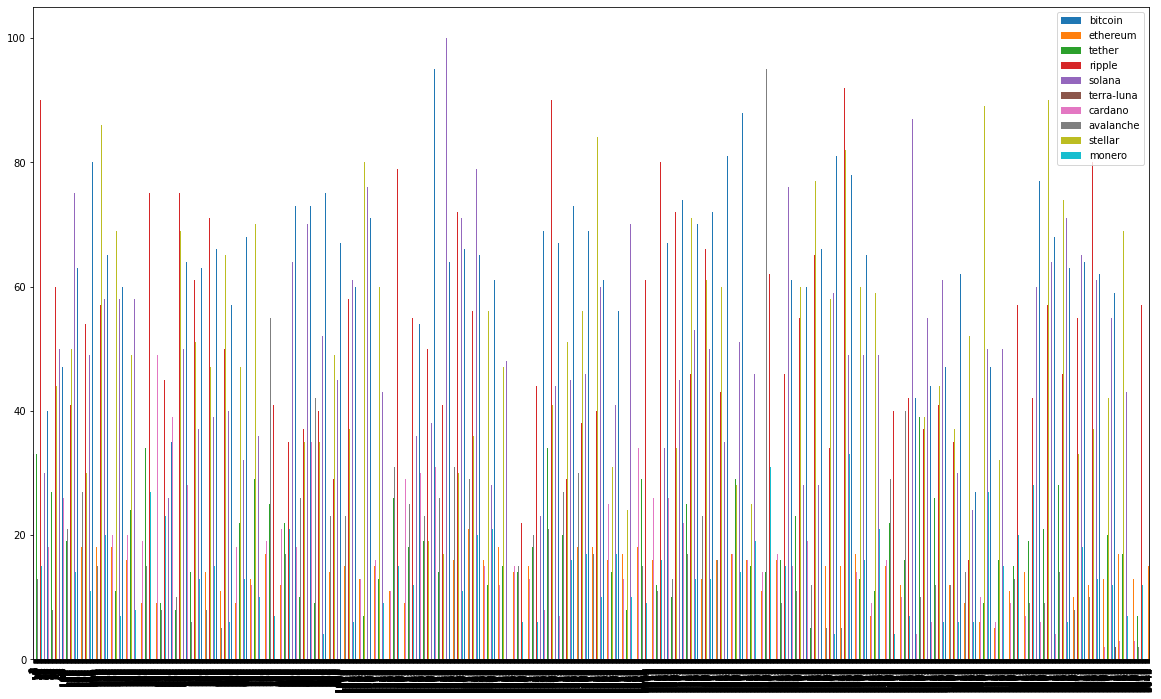

In [49]:
trend_hhi.plot(figsize=(20, 12), y=kw_list, kind ='bar')

#### Interest over time

In [59]:
kw_list_1 = ['bitcoin', 'ethereum', 'tether', 'ripple', 'solana'] 
kw_list_2 = ['terra-luna', 'cardano', 'avalanche', 'stellar', 'monero']

In [63]:
pytrends.build_payload(kw_list_2, timeframe='today 1-m')

In [62]:
interest_1 = pytrends.interest_over_time()

In [64]:
interest_2 = pytrends.interest_over_time()

In [74]:
interest = pd.merge(interest_1, interest_2, on='date').drop(columns=['isPartial_x', 'isPartial_y'])

In [76]:
interest.to_csv(('./data/GoogleTrend_InterestOverTime'+ '.csv'))

## Qualitative Data

### Listing on Exchanges

In [25]:
# load excel
exchange_listing_excel = pd.read_excel('./data/hand/excel/exchange_listing.xlsx')

In [26]:
# save dataframe as csv
exchange_listing_excel.to_csv('./data/hand/csv/exchange_listing' + '.csv')

### Consensus 

Algorithm Type: Proof-of-Work, Proof-of-Stake, Own

In [27]:
consensus = pd.read_excel('./data/hand/excel/Consens.xlsx')

In [28]:
consensus.to_csv('./data/hand/csv/consensus' + '.csv')

### Blockchain Type

In [29]:
blockhain_type = pd.read_excel('./data/hand/excel/blockchain_type.xlsx')
blockhain_type.to_csv('./data/hand/csv/blockchain_type' + '.csv')

### Blockchain Opertion

On which blockchain operating? Own (Coin) vs other (Token)

In [30]:
blockchain_operation = pd.read_excel('./data/hand/excel/blockchain_operation1.xlsx')
blockchain_operation.to_csv('./data/hand/csv/blockchain_operation' + '.csv')

### Application / Use Cases

In [9]:
application_bitcoin = ['paymnet', 'money exchange', 'money transfer']
application_ethereum = ['dApps', 'smart contracts', 'coin hosting']
application_tether = ['bound to fiat currency', 'payment', 'money exchange', 'money_transfer']
application_ripple = ['Currency exchange intermediaries', 'currency exchange', 'valuables exchange']
application_solana = ['dApps', 'network fee payments']
application_cardano = ['low cost blockchain', 'high speed','payments', 'transactions']
application_avalanche = ['deFi platform', 'smart contracts', 'network fee payments', 'other blockhain support', "ethereum toolkit support"]
application_monero = ['anonymous payments', 'untracable payments']
application_stellar = ['create digital representations of money', 'send money', 'trade money']

In [31]:
application = pd.read_excel('./data/hand/excel/application.xlsx')

In [32]:
application.to_csv('./data/hand/csv/application' + '.csv')

### Persons/Organizations Involved

In [10]:
persons_bitcoin = ['Satoshi Nakamoto']
persons_ethereum = ['Vitalik Buterin', 'Gavin Wood', 'Mihai Alisie', 'Amir Chetrit', 'Anthony Di Iorio', 'Charles Hoskinson', 'Joseph Lubin', 'Jeffrey Wilcke']
persons_tether = ['Brock Pierce', 'Reeve Collins', 'Craig Sellars']
persons_ripple = ['Jed McCale', 'Chris Larsen']
persons_solana = ['Anatoly Yakovenko', 'Greg Fitzgerald']
persons_cardano = ['Charles Hoskinson']
persons_avalance = ['Emin Guen Sirer', 'Kevin Sekniqi', 'Ted Yin']
persons_stellar = ['Jed McCaleb', 'Denelle Dixon', 'Joyce Kim']
persons_monero = ['Nicolas van Saberhagen', 'Riccardo Spagni', ]
organization_ripple = ['Ripple Labs']
organization_solana = ['Solana Labs']
organization_avalanche = ['Ava Labs']
organization_stellar = ['Stellar Development Foundation']

In [33]:
persons = pd.read_excel('./data/hand/excel/persons.xlsx')
persons.to_csv('./data/hand/csv/persons' + '.csv')

### Merge Qualitative data

In [34]:
consensus = pd.read_csv('./data/hand/csv/consensus.csv')
blockchain_type = pd.read_csv('./data/hand/csv/blockchain_type.csv')
blockchain_operation = pd.read_csv('./data/hand/csv/blockchain_operation.csv')
exchange_listing = pd.read_csv('./data/hand/csv/exchange_listing.csv')
application = pd.read_csv('./data/hand/csv/application.csv')
persons = pd.read_csv('./data/hand/csv/persons.csv')

frames = [consensus, blockchain_type, blockchain_operation, exchange_listing, application, persons]

result = pd.concat(frames)

In [35]:
result

,Unnamed: 0.1,Unnamed: 0,Bitcoin,Ethereum,Tether,Ripple,Solana,Terra Luna,Cardano,Avalanche,Stellar,Monero,Unnamed: 6
0,0,Proof-of-Work,1,1,1,0,0,0.0,0,0,0,1,NaN
1,1,Proof-of-Stake,0,0,1,0,1,1.0,1,1,0,0,NaN
2,2,custom consens,0,0,0,1,0,0.0,0,0,1,0,NaN
0,0,Public Blockchain,1,1,1,1,1,NaN,1,1,1,1,NaN
1,1,Private Blockchain,0,0,0,0,0,NaN,0,0,0,0,NaN
2,2,Consortium Blockchain,0,0,0,0,0,NaN,0,0,0,0,NaN
0,0,Own Blockhain,1,1,0,o,1,NaN,1,1,0,0,NaN
1,1,Other Blockchain,0,0,"Bitcoin, Ethereum, EOS, Tron, Algorand, OMG Ne...",0,0,NaN,0,0,0,CryptoNote,NaN
2,2,No Blockchain,0,0,0,1,0,NaN,0,0,1,0,NaN
0,0,binance,1,1,1,1,1,1.0,1,1,1,1,NaN


In [36]:
result.rename(columns = {'Unnamed: 0':'Characteristics'}, inplace = True)

In [38]:
result = result.drop(columns=['Unnamed: 0.1', 'Unnamed: 6', 'Terra Luna'])

In [42]:
result.to_csv('./clean/hand_data' + '.csv', index = False)